<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Convolution-Neural-Networks/blob/main/Basics_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General applicatins of CV

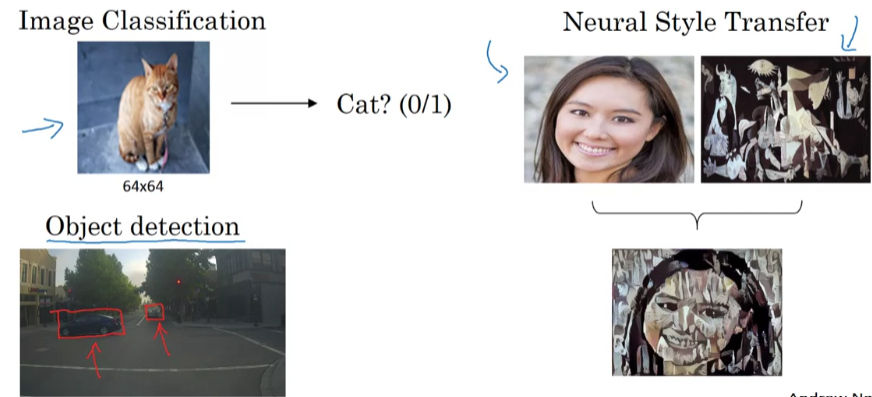

Now, if we are building a basic neural network for image classification, 

Input features = pixel * pixel*3

So, although it works for 64 * 64 pixel image, 

It might create problem for a high resolution image such as 1000pixel image as:

No. of features = 1000 * 1000 * 3 = 3M

Now, suppose if we have a single hidden layer with 1000 neurons, then the weights matrix will be of 3B size

Now, running the neural networks on such data is not only computationally expensive but can lead to overfitting

Hence the solution is the convolution operation

## Convolution Operation

In a convolution operation:

  * the matrix notation of image(say 6 * 6) is convoluted with a 3 * 3 filter/kernel to produce a 4 * 4 matrix
  * convoluted means, filter is placed on top of the image and shifted by some distance after each calculation (which is element wise multiplication)

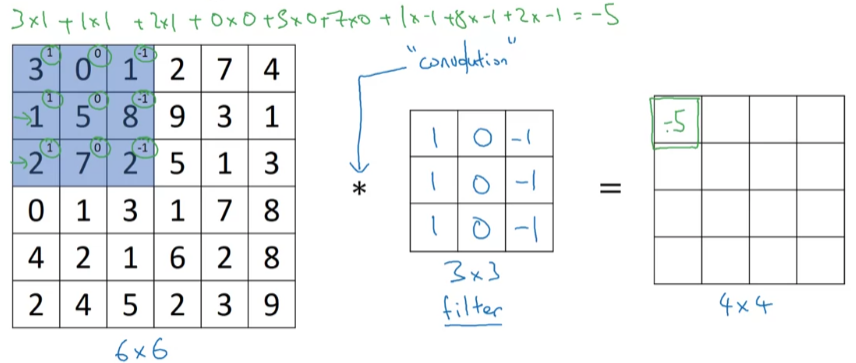

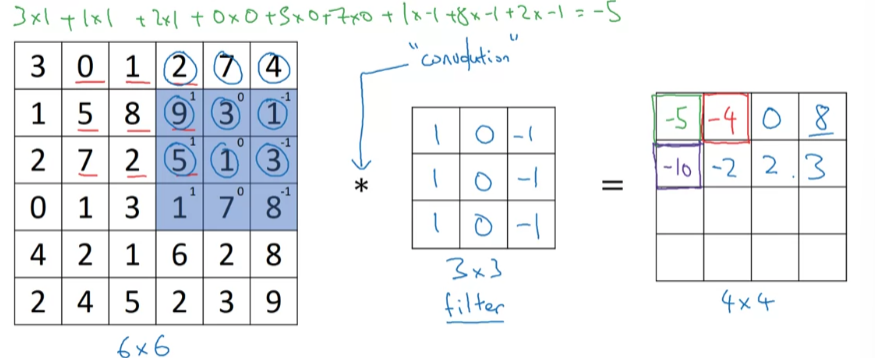

python ```conv-forward```

tensorflow ```tt.nn.conv2d```

keras ```Conv2D```

### Vertical Edge Detection using Convolution

How we detect vertical edges using this convolution operation : 

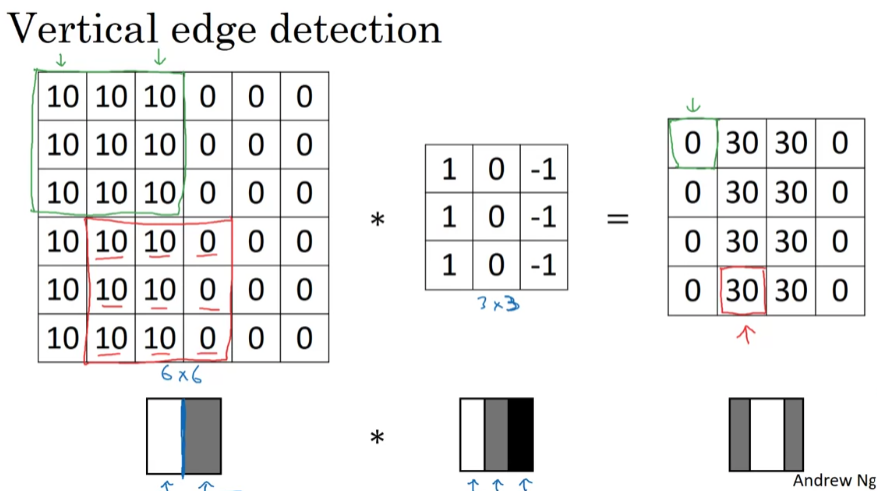

One takeaway from this is that a vertical edge is a 3 * 3 region where there are bright pixel on the left and dark pixels on the right

Now, if the bright pixels in the image are reversed with dark pixels, what we get is a matrix containing 0's and -30's. So, to just identify edges, we can take their absolute values

eg:

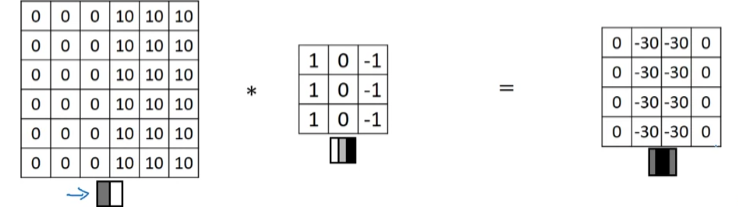

### detecting Horizontal edge

to identify horizontal edge, we need to specify our filter

Our filter should be bright on top and relatively dark on the bottom

In [ ]:
import numpy as np

horz_flt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
horz_flt

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

### Padding

When convolving 6 * 6 image with 3 * 3 filter, we get output as 4 * 4 matrix

So, for n * n image, convoluted with f * f filter, the dimensions of output will be n-f+1 * n-f+1

There are two downsides to this:
1. every time we apply convolution operator, our image shrinks, hence we can only do this a few times before our image shrinks to 1 * 1
2. The edge pixels are only considered few times while center pixels of image are part of f * f operations, hence we are throwing away information from edges

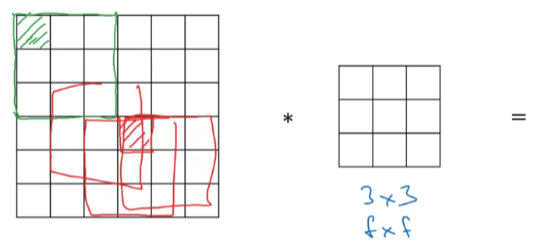

The solution to these is we can pad the image with an additional 1pixel border

So, our image changes from 6 * 6 to 8 * 8 which when convoluted with 3 * 3 filter produces output matrix of 6 * 6, hence we manage to preserve our original size

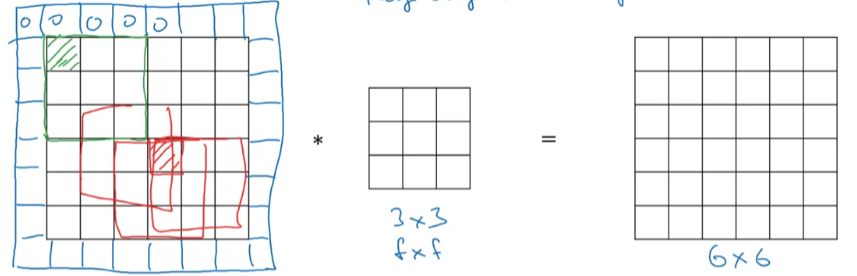

Conventional way to pad is to pad with 0's, and the padding amount is 1 which is addition of 1-pixel border

Hence, generalizing, the output matrix has new dimentions as 

```
(n + 2p -f + 1) * (n + 2p -f +1)
```

Numpy Function for padding : ```np.pad(matrix, (before, after), mode = 'constant', constant_values = (0))```

before and after is specified for each axis

Eg: for a matrix of dimentions m * H * W * C, function to pad it with zeros for all dimensions with pad = 2 will look like

```
np.pad(matrix, ((2, 2), (2, 2), (2, 2), (2, 2)), mode = 'constant', constant_values = (0))
```

#### Valid and Same convolutions

In terms of how much to pad, there are 2 common choices : valid and same

valid means no padding

same means the output matrix has same dimension as input image

```
n+2p-f+1 = n
2p-f+1 = 0
p = (f-1)/2
```

f is usually odd as it has a central pixel which can be sometimes nice

### Strided Convolutions

applying convolution operation with a stride of 2 means, instead taking a single step to calculate the next value of final matrix, we take 2 steps

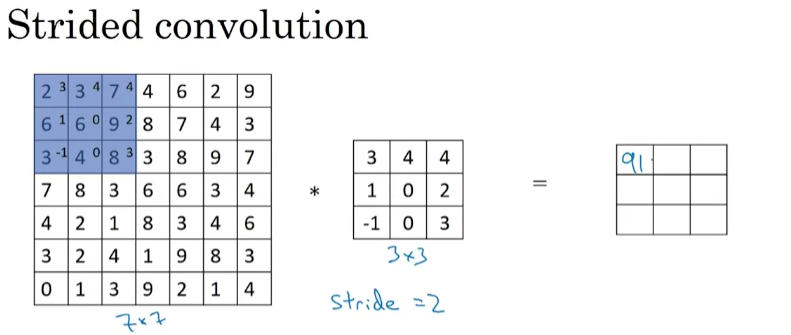

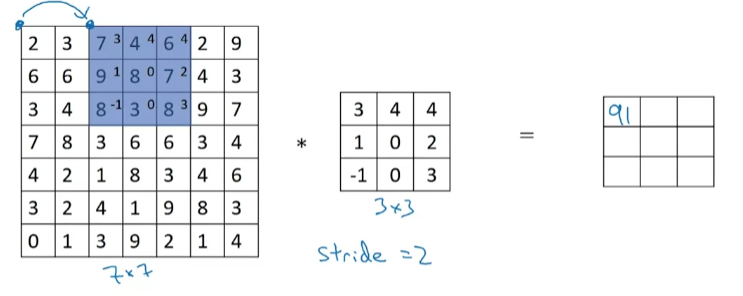

same goes for row steps

So, the dimension of the computed matrix becomes:

```
((n+2p-f)/s + 1) * ((n+2p-f)/s + 1)
```

If the fraction is not an integer, we round it down, i.e. we take floor values

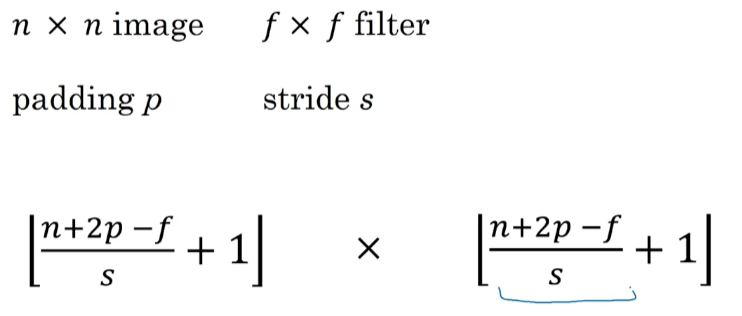

## Convolution Over volume

For RGB images, we convolve this not with 3 * 3 filter but 3 * 3 * 3 filter

The dimentions are height, width and channels respectively

The number of channels for both input image and filter must be same

for a 6 * 6 * 3 RGB image convoluted with 3 * 3 * 3 filter, the result is a 4 * 4 matrix

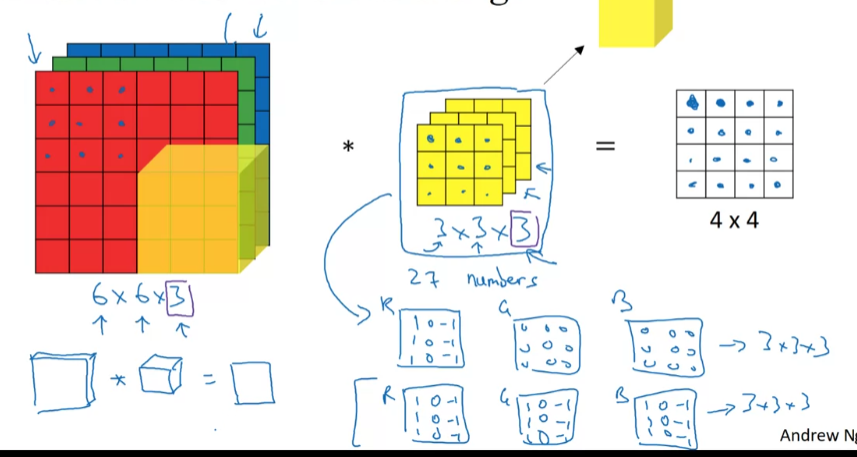

What we do is just apply simple convolution for each channel and add up those values to make up the first block of the output matrix

Because of these 3 channels in filter, we can get different feature detectors.

We can have vertical edge detection only in red and so on...

Now, what if we want to detect two features simultaneously, we want to detect vertical as well as horizontal edges

For that, we take two filters, convolute it, and then stack the resulting matrices, hence the resulting matrix gets converted from 2D to 3D

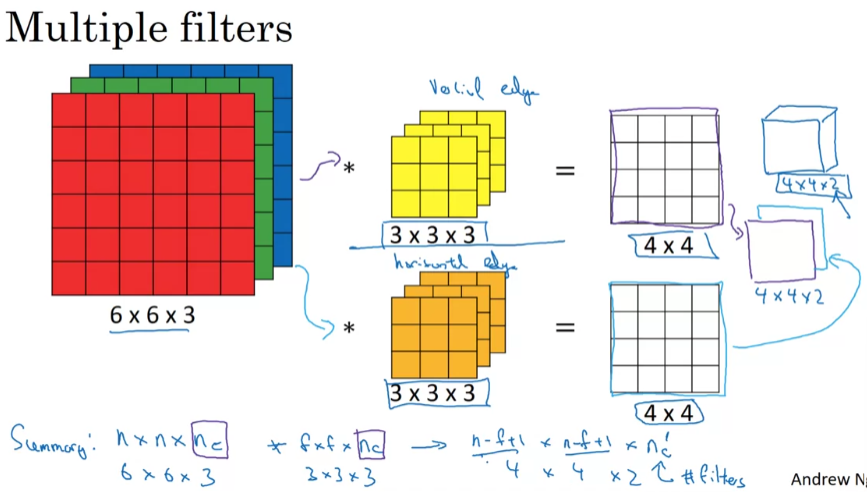

Keep in mind this is when there's no padding and stride is 1.

## One Layer of a Convolution Network

As done in the previous example, when we compute the outputs of those two filters, what we do is add a bias which is real number to each of the matrix and pass it through a non-linearity function (ReLu)

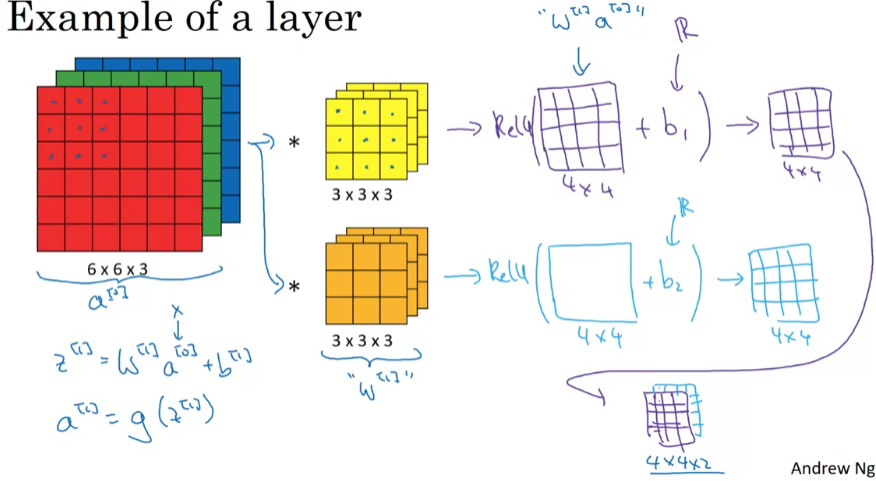

If you have 10 filters that are 3 * 3 * 3 in one layer of a neural network, how many parameters does that layer have?

for a single filter = 3 * 3 * 3 = 27 + bias = 28
for whole network = 28 * 10 = 280


Now, whatever the size of the input image is, the number of parameters are fixed. This is why convolution neural networks don't overfit

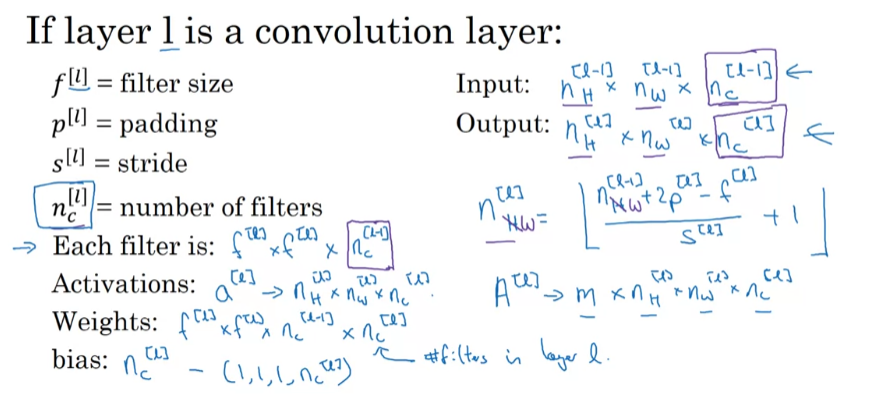

Qn : Suppose your input is a 300 by 300 color (RGB) image, and you use a convolutional layer with 100 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)?

Ans : you have 25×3=75 weights and 1 bias per filter => 76 parameters per filter. Given that you have 100 filters, you get 7,600 parameters for this layer.

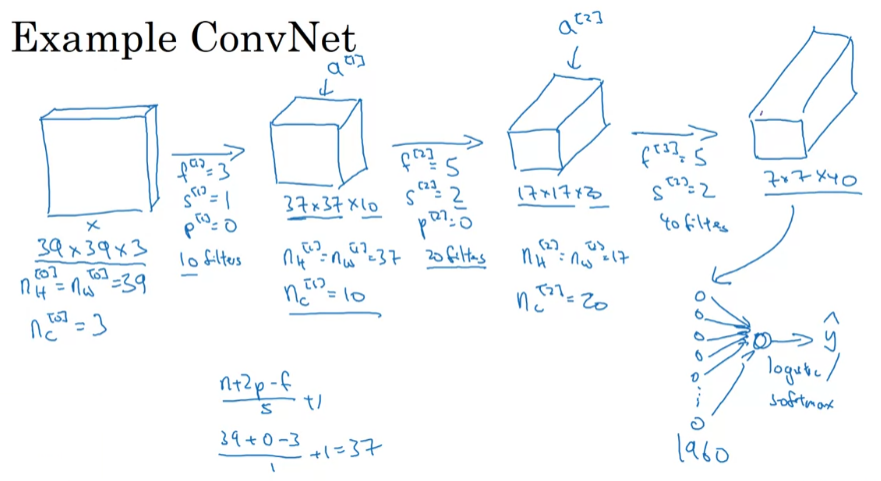

When we find our final matrix, we flatten it out and feed it to our logistic regression or softmax

A lot of work in cnn is selecting these hyperparameters

Although it is possible to design a pretty good nn using just convolution layers, most nn architectures will have other layers as:
* Pooling layers
* Fully Connected layers

## Pooling Layers

Conv nets also use pooling layers to reduce the size of representation to speed the computation as well as make some of the features a bit more robust

eg: max pooling

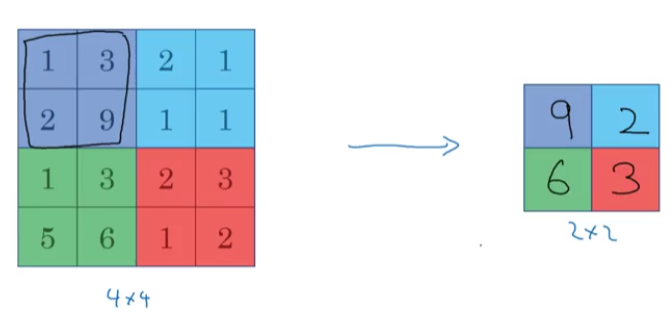

Here, we have applied max pooling with filter size = 2 * 2 and stride of 2

Intution of max pooling : If you think of this 4 * 4 feature matrix, it has some regions activated maybe it has detected a particular feature

What max pooling does is if one of the feature is detected, it then remains preserved in the output of max pooling

The above is the reason most people cite, but it's been found in a lot of experiments to work well. The intution described above may not be the real underlying reason

The output size of the end matrix can also be computed through the above formulas

For a 3D matrix, the channels of the output matrix is the same as channels of the input matrix

eg: for 5 * 5 * 2 with f = 3 and stride = 1, output will be 3 * 3 * 2

We just perform the computation described above on each channel independently

There is also average pooling whose concept is self explanatory

It contains no parameters that need to be trained through back propagation.

It has fixed parameters which define this layer which are filter size and stride

## CNN Example

When people report the number of layers in NN, one way is to count each layer added i.e. Conv, Pool or FC

usually people just record the number of layers that have weight, that have parameters. And because the pooling layer has no weights, has no parameters, only a few hyper paratmeters, we count conv and pool layer as one.

The fully connected layer is a single densely connected neural network layer

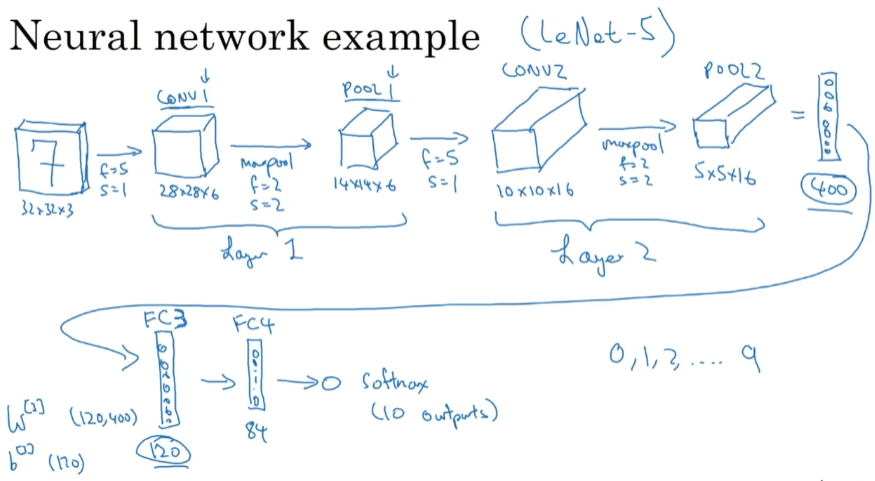

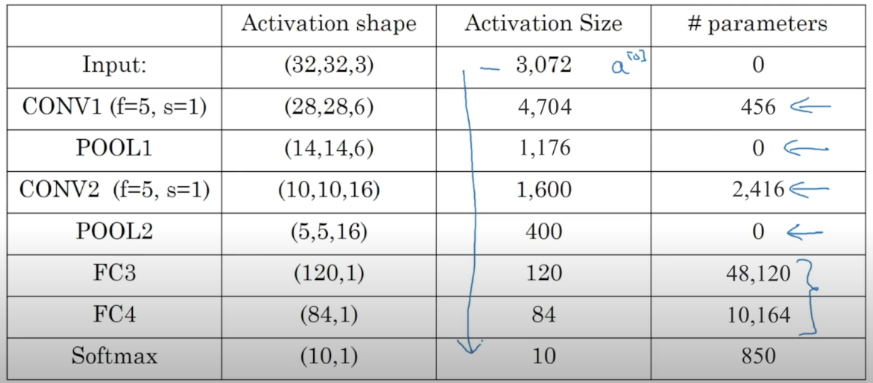

As we go deeper in nn, the height and width decrease whereas the number of channels increase

## Why Convolutions

* Parameter Sharing: Once we have discovered an effective filter for (say) vertical edge detection, we can use it multiple times. Hence we can use the same parameter in lots of different positions.

* Lesser parameters to work with

  * For a traditional fully connected neural network, for a 300 ✖ 300 RGB image fully connected with 100 neurons, the number of parameters will be 300 ✖ 300 ✖ 100 = 27,000,000 + 100(bias) = 27,000,100

* Sparsity of Connections:
  * Each activation in the next layer depends on only a small number of activations from the previous layer

The conv layers and the fully connected layers will have various parameters. So, any setting of the parameters lets you define a cost function.

To train this neural network, all we need to is then use gradient descent or some of the algorithm like : gradient descent momentum, or RMSProp or Adam in order to optimize all the parameters of the neural netowrk to reduce the cost function